# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** W

**Names:**

* Olivier Cloux
* Thibault Urien
* Saskia Reiss

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics


#### Exercise 2.9: Simulate an epidemic outbreak

In [1]:
# Imports
import epidemics_helper
import json
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.readwrite import json_graph


In [2]:
# Instead of using requests, we use the json reader in networkx to be able to read and draw the graph.
with open('../data/nyc_augmented_network.json') as data_file:
    data = json.load(data_file)
    g = json_graph.node_link_graph(data)
    sir = epidemics_helper.SimulationSIR(g, beta=10.0, gamma=0.1)
    sir.launch_epidemic(23654,100)

Epidemic stopped after 104.63 days | 104.63 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


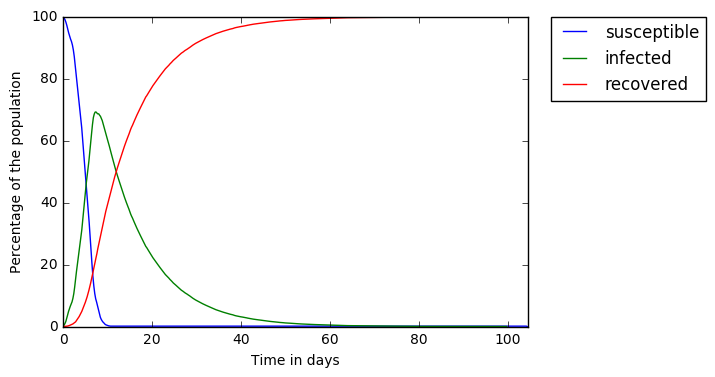

In [3]:
def plotSIR(simu):
    # Plot the susceptible people over time
    sortedS = list(sorted(map( lambda x : min(x, simu.max_time),simu.inf_time)))
    valuesS, baseS = np.histogram(sortedS, bins=500)

    # Plot the infected people over time
    sortedI = list(filter(lambda x : x < simu.max_time,sortedS))
    valuesI, baseI = np.histogram(sortedI, bins=500,range=[0,100])

    # Plot the recovered people over time
    sortedR = list(sorted(filter( lambda x : x < simu.max_time,simu.rec_time)))
    valuesR, baseR = np.histogram(sortedR, bins=500,range=[0,100])

    #evaluate the cumulative, to be able to have curves instead of bins.
    cumulativeS = np.cumsum(valuesS)
    cumulativeR = np.cumsum(valuesR)
    cumulativeI = np.cumsum(valuesI) - cumulativeR

    # plot the cumulative susceptible function
    plt.plot(baseS[:-1], (len(sortedS)-cumulativeS)/len(sortedS) *100, c='blue', label="susceptible")
    #plot the cumulative infected function
    plt.plot(baseI[:-1],(cumulativeI )/len(sortedS) *100, c='g',label="infected")
    #plot the cumulative recovered function
    plt.plot(baseR[:-1], (cumulativeR)/len(sortedS) *100, c='red',label="recovered")

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel("Time in days")
    plt.ylabel("Percentage of the population")
    plt.ylim([0, 100])
    plt.xlim([0, simu.max_time])
    plt.show();
    
plotSIR(sir)

In [4]:
# Helper function to give each node the right color
def nodesColor(time, simu, colors = ['blue','green','red']):
    return list(map(lambda i,r : colors[0] if time < i else (colors[1] if time < r else colors[2]),simu.inf_time,simu.rec_time))
    

In [5]:
def nyMap(time):
    plt.figure(figsize=(20,20)) 
    plt.axis("off")
    positions = nx.get_node_attributes(g,'coordinates')
    nodes = nx.draw_networkx_nodes(g,positions,node_size=10)
    nodes.set_linewidth(0)
    colors = nodesColor(time,sir)
    nodes.set_color(colors)
    nx.draw_networkx_edges(g,positions)
    plt.title("State of epidemy at day "+str(time),{"fontsize":25})
    plt.show();

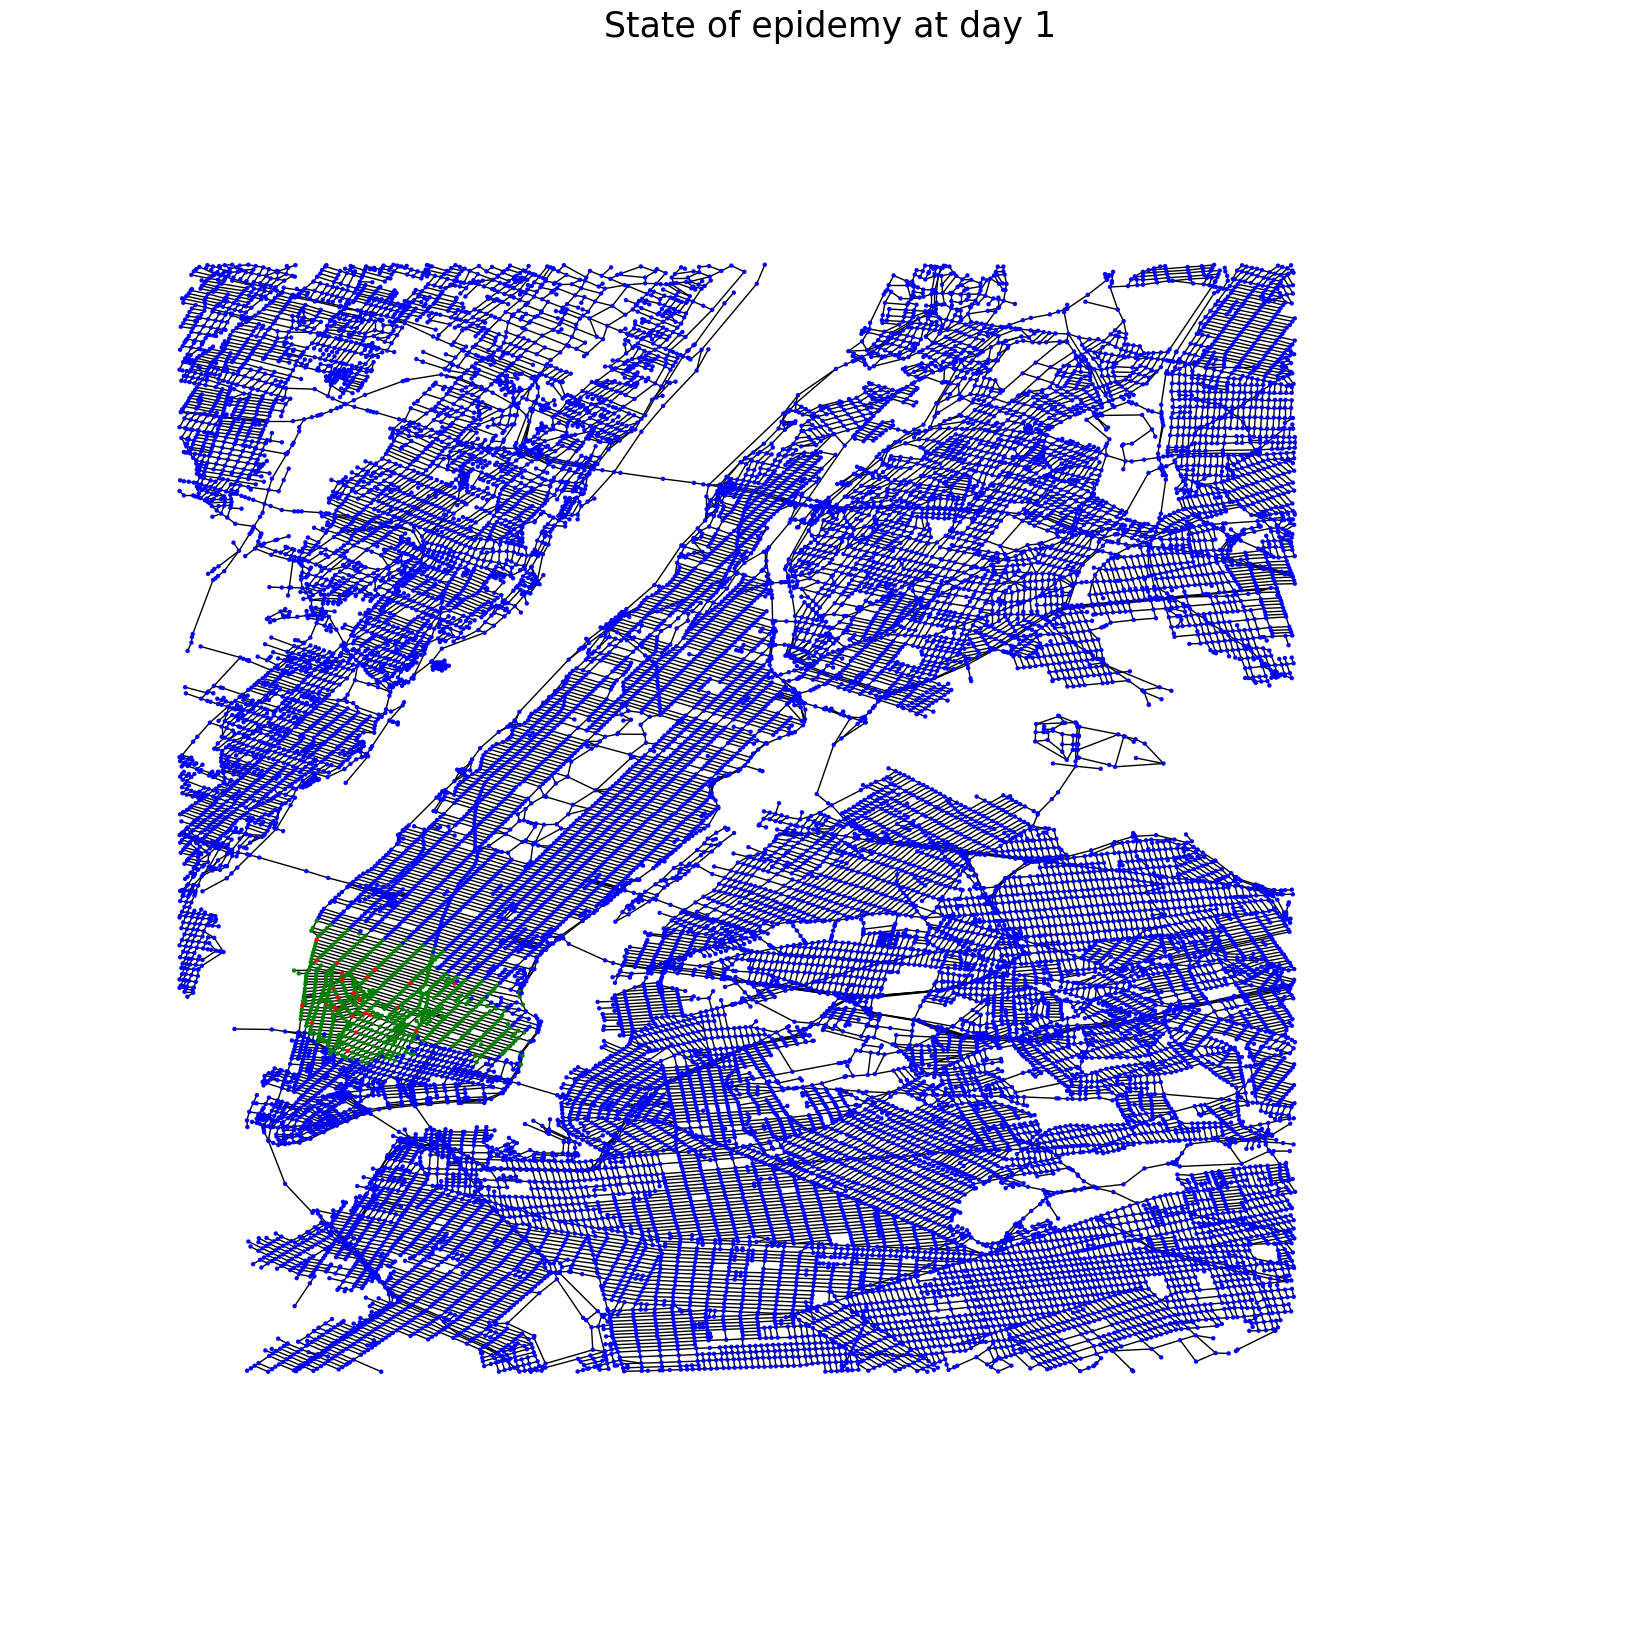

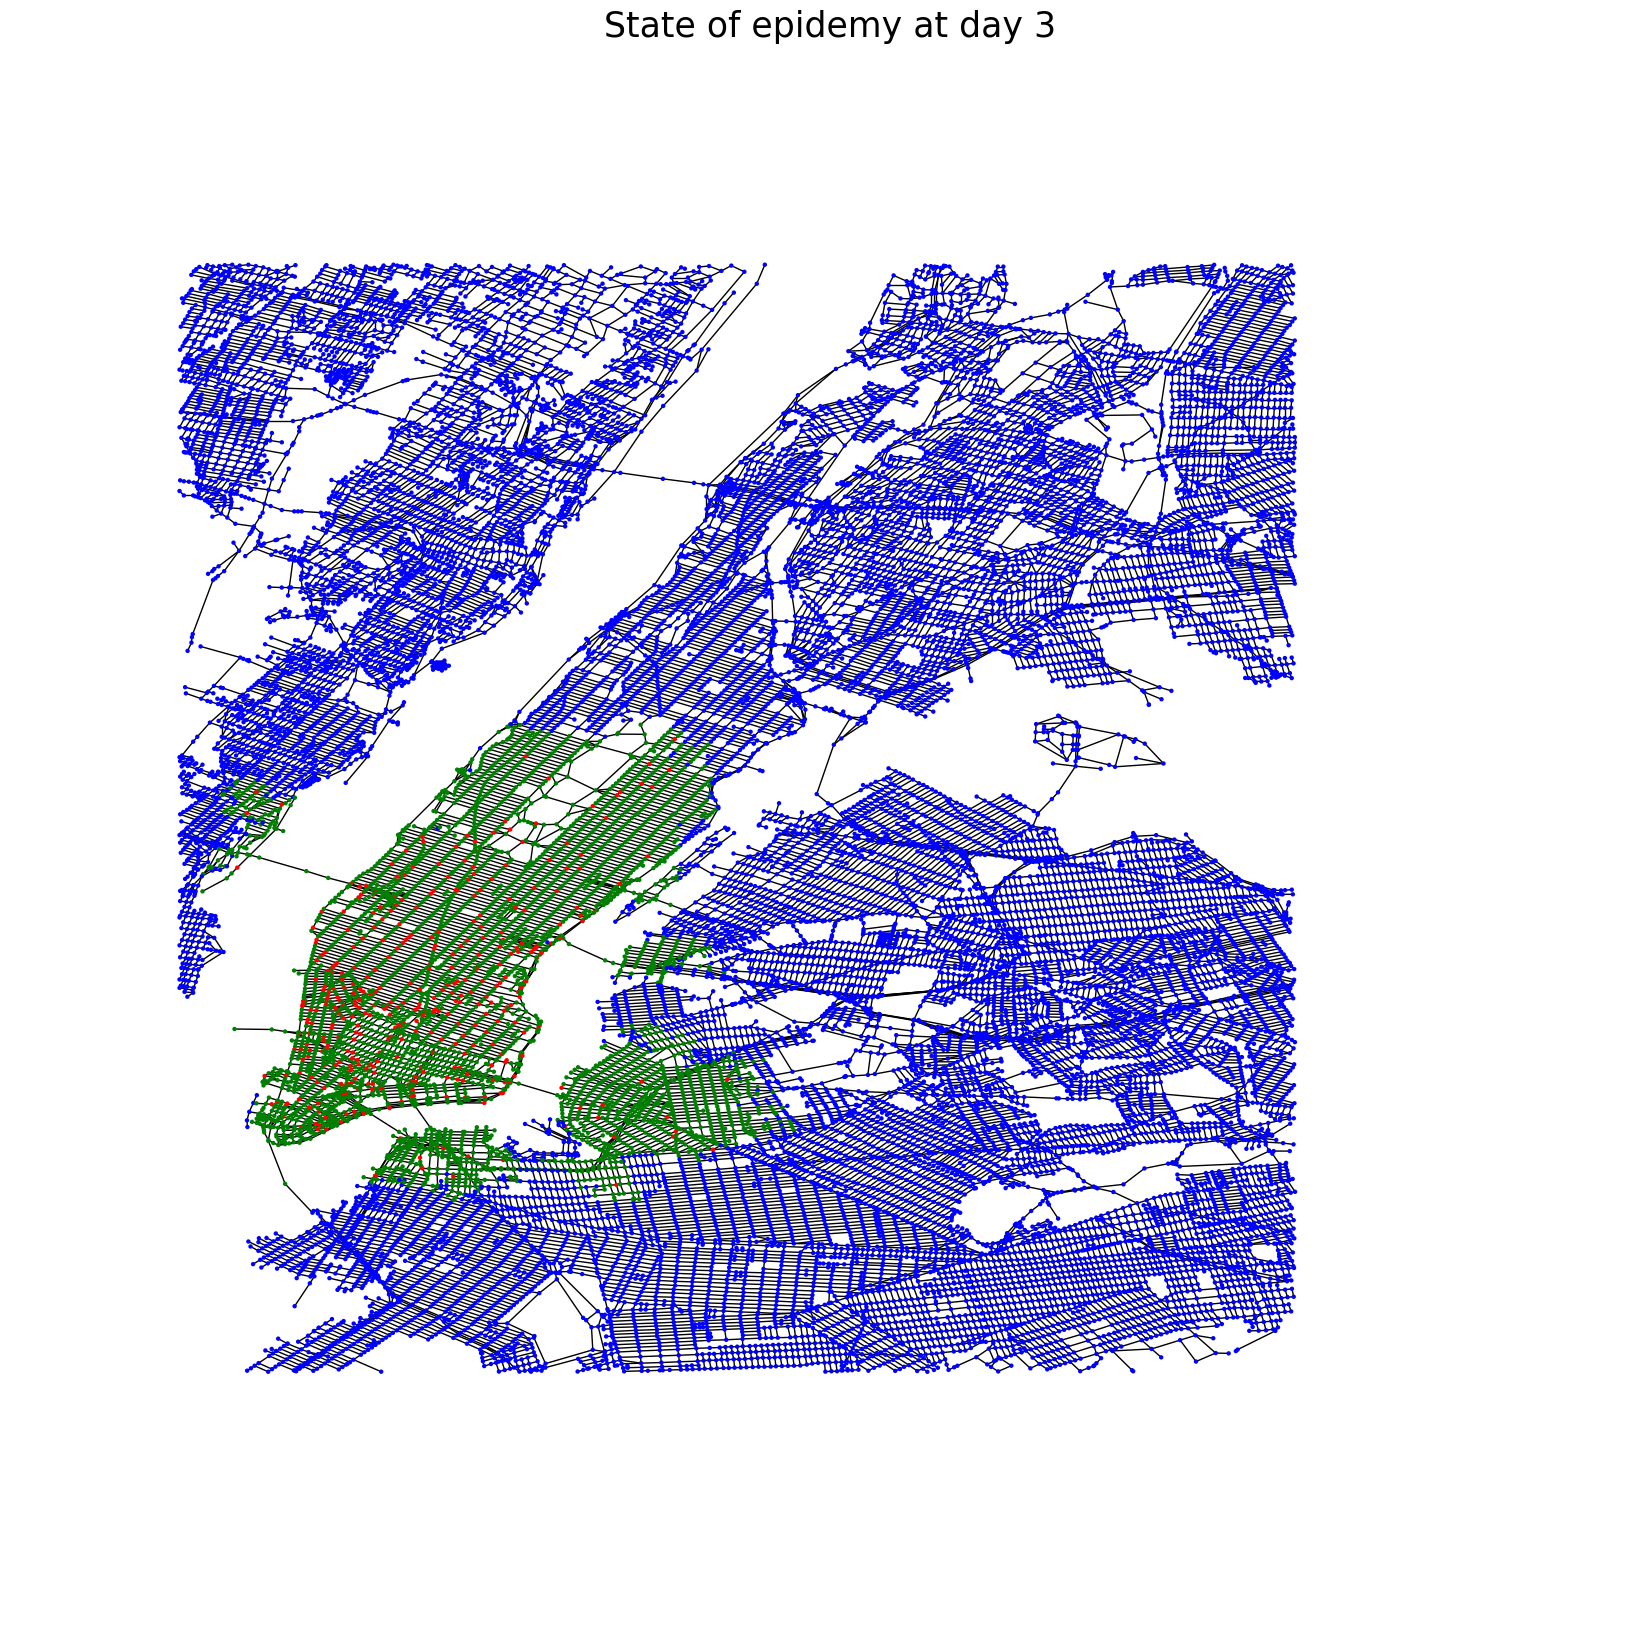

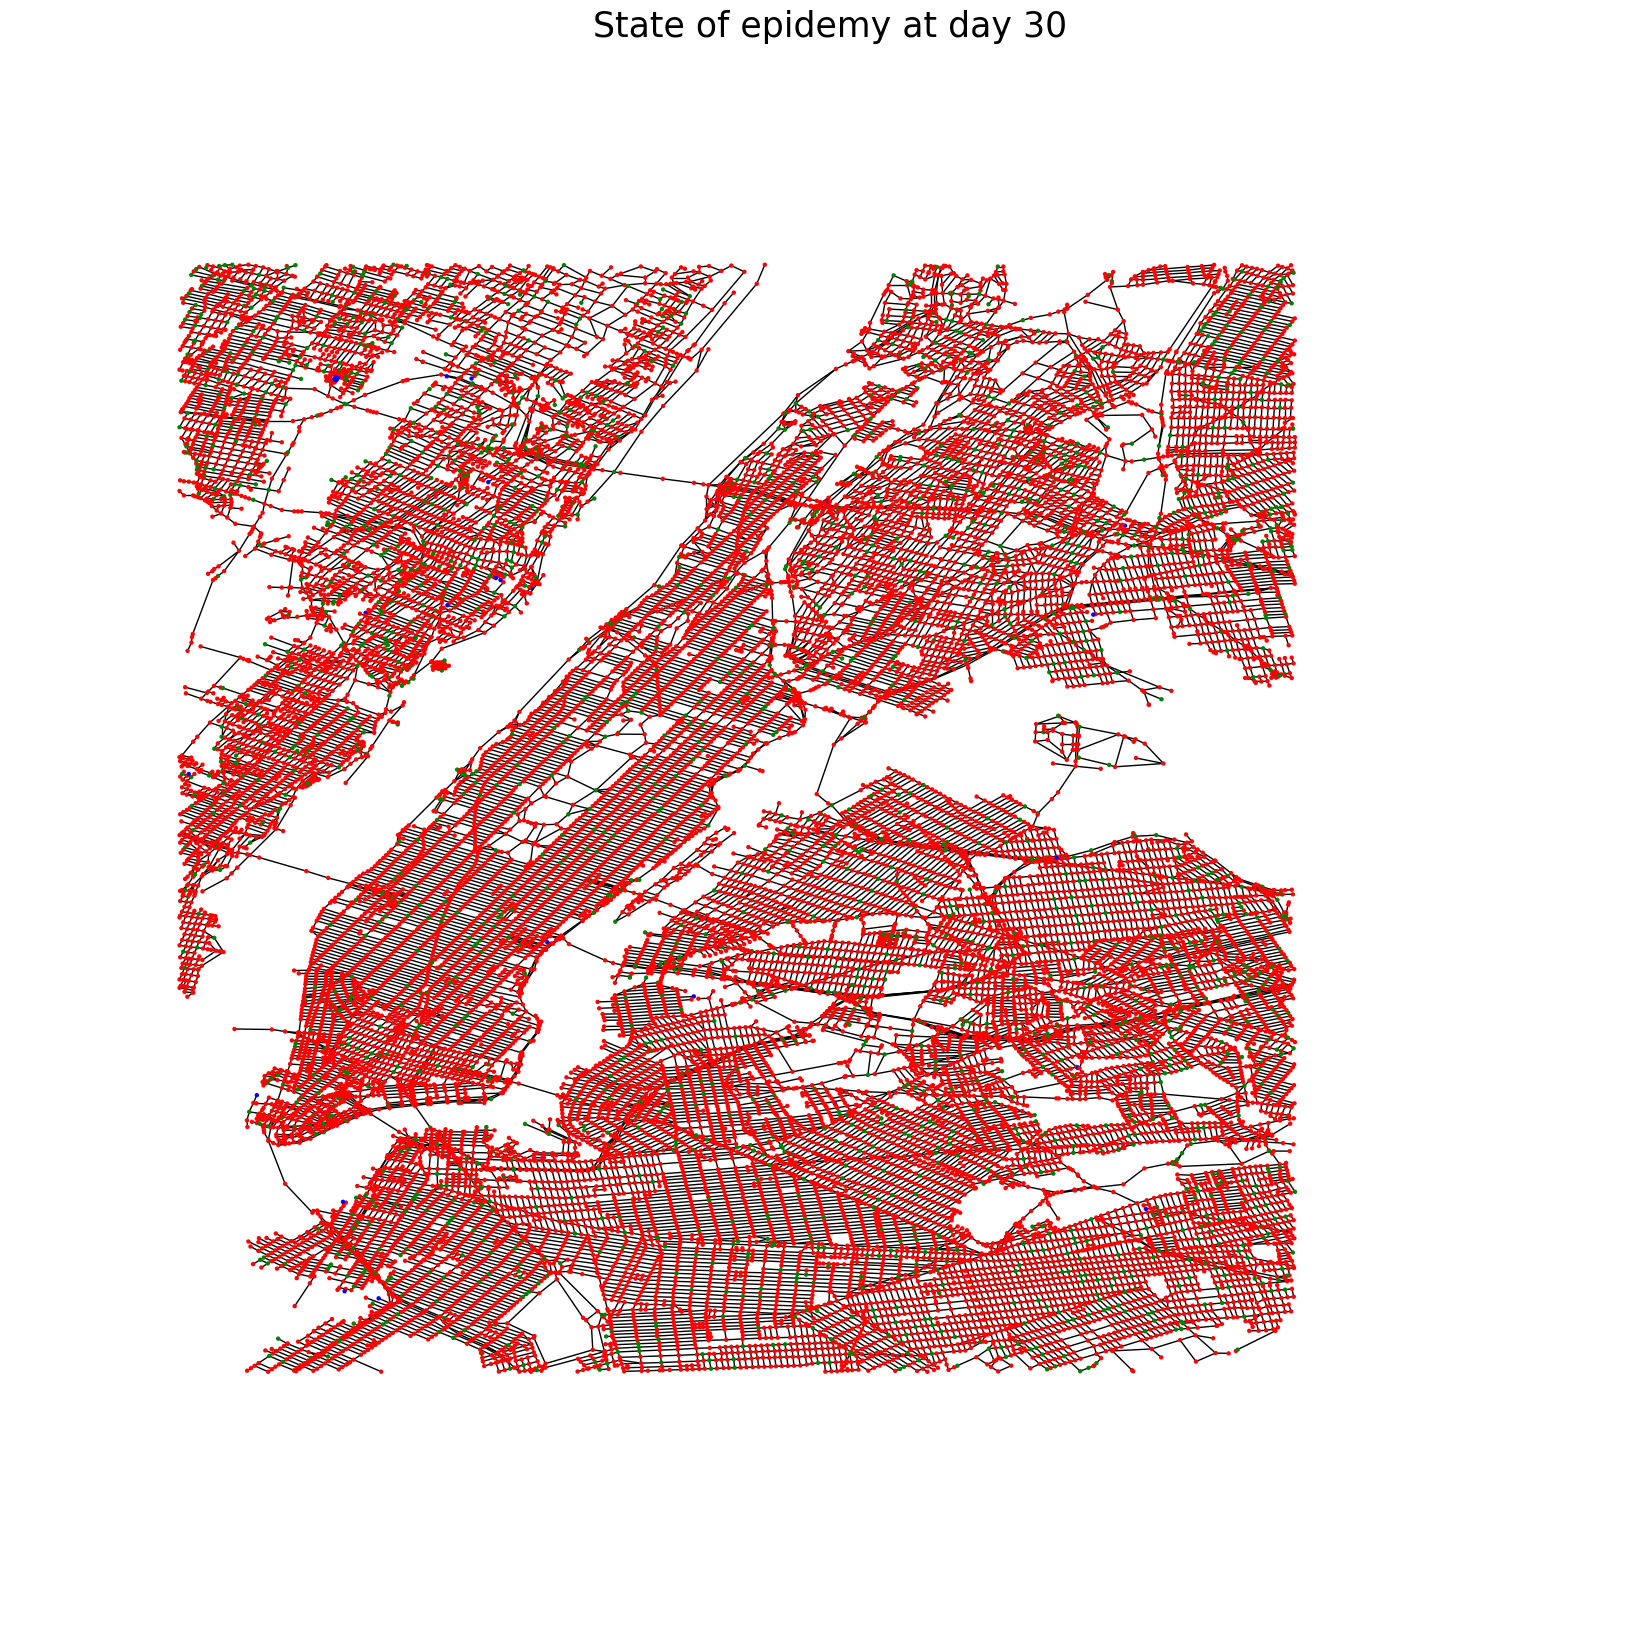

In [6]:
nyMap(1)
nyMap(3)
nyMap(30)

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [ ]:
import random

i = 0
# This will give us a list of all edges in the type [(node1, node2), ...]
list_edges = g.edges()

for i in range(0, 999):
    # Choose a random number between 0 and the length of our array
    x = random.randint(0, len(list_edges)-1)
    # Remove this random edge
    list_edges.pop(x)


#### Exercise 2.11: Strategy 2